# Page View Time Series Visualizer

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

-   Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the  `date`  column.
-   Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
-   Create a  `draw_line_plot`  function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be  `Daily freeCodeCamp Forum Page Views 5/2016-12/2019`. The label on the x axis should be  `Date`  and the label on the y axis should be  `Page Views`.
-   Create a  `draw_bar_plot`  function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of  `Months`. On the chart, the label on the x axis should be  `Years`  and the label on the y axis should be  `Average Page Views`.
-   Create a  `draw_box_plot`  function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be  `Year-wise Box Plot (Trend)`  and the title of the second chart should be  `Month-wise Box Plot (Seasonality)`. Make sure the month labels on bottom start at  `Jan`  and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

For each chart, make sure to use a copy of the data frame.

The boilerplate also includes commands to save and return the image.

# My Solution

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("./fcc-forum-pageviews.csv", header=0, index_col=0, parse_dates=True)


In [2]:
# Clean data (keep 2 standard deviations of the data)
df = df.loc[
    (df["value"] >= df["value"].quantile(0.025))
    & (df["value"] <= df["value"].quantile(0.975))
]


## Draw Line Plot

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Page Views'),
 Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')]

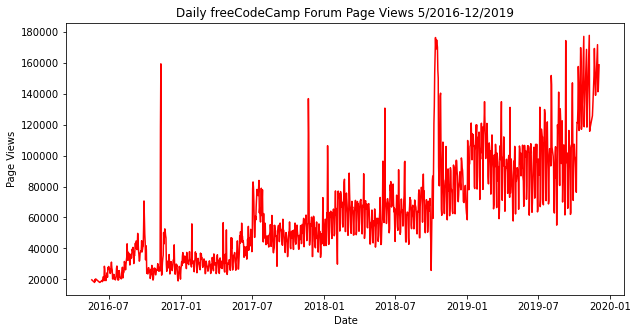

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df, c="r")

ax.set(
    xlabel="Date",
    ylabel="Page Views",
    title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019",
)


In [1]:
# save figure
fig.savefig('line_plot.png')

NameError: name 'fig' is not defined

## Draw Bar Plot

In [4]:
# Copy and modify data for monthly bar plot
df_bar = df.groupby([df.index.year, df.index.month]).mean().unstack()

# display df_bar
display(df_bar)

value                                                           \
date             1              2             3             4             5    
date                                                                           
2016            NaN            NaN           NaN           NaN  19432.400000   
2017   32785.161290   31113.071429  29369.096774  30878.733333  34244.290323   
2018   58580.096774   65679.000000  62693.774194  62350.833333  56562.870968   
2019  102056.516129  105968.357143  91214.483871  89368.433333  91439.903226   

                                                                              \
date            6             7              8             9              10   
date                                                                           
2016  21875.105263  24109.678571   31049.193548  41476.866667   27398.322581   
2017  43577.500000  65806.838710   47712.451613  47376.800000   47438.709677   
2018  70117.000000  63591.064516   62831.612903  65941.733333  111378.142857   
2019  90435.642857  97236.566667  102717.310345  97268.833333  122802.272727   

                                    
date             11             12  
date                                
2016   40448.633333   27832.419355  
2017   57701.566667   48420.580645  
2018   78688.333333   80047.483871  
2019  143166.428571  150733.500000

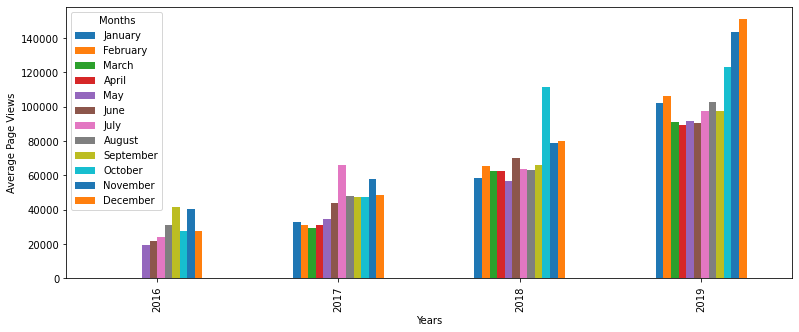

In [5]:
# draw bar plot
fig = df_bar.plot(
    kind="bar", figsize=(13, 5), xlabel="Years", ylabel="Average Page Views"
).figure


plt.legend(
    title="Months",
    labels=[
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ],
)


In [ ]:
# save figure
fig.savefig('bar_plot.png')

## Draw Box Plot

In [6]:
# Prepare data for box plots
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box["year"] = [d.year for d in df_box.date]
df_box["month"] = [d.strftime("%b") for d in df_box.date]
df_box = df_box.sort_values(by=["year", "month"])

[Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Page Views')]

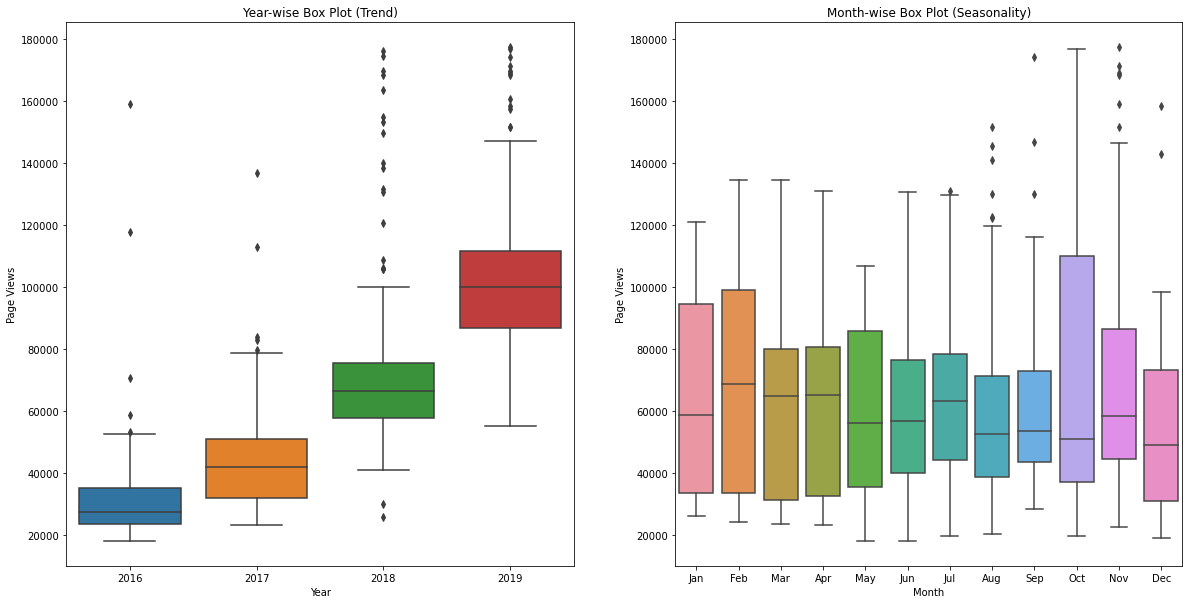

In [7]:
# Draw box plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax1 = sns.boxplot(x="year", y="value", data=df_box, ax=ax1)
ax2 = sns.boxplot(
    x="month",
    y="value",
    data=df_box,
    ax=ax2,
    order=[
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)

ax1.set(title="Year-wise Box Plot (Trend)", xlabel="Year", ylabel="Page Views")
ax2.set(title="Month-wise Box Plot (Seasonality)", xlabel="Month", ylabel="Page Views")


In [ ]:
# save figure
fig.savefig('box_plot.png')